# Arctic Sea Ice: How thick was it and how fast did it melt?

At Ocean Networks Canada's seafloor coastal observatory in Cambridge Bay, NU there is an Ice Profiler instrument, which can measure the thickness of the sea ice above it. 

<img src="/Ice Draft/Cambridge_Bay_Nunavut_Location.png" width="" align="" />

In the fall we can see ice begin to grow. It typically continues growing until the next summer, when weather turns warm and the ice melts rapidly. Let's take a look at the pattern of ice melt during the summer of 2019.

## Request scalar ice thickness data

Here we are going to use the scalardata service to obtain ice thickness between June 1st and July 2nd 2019.

In [1]:
import sys #access to system-specific parameters and functions

!{sys.executable} -m pip install --upgrade onc -q #ensures the command uses the pip associated with that environment


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [5]:
#import all libraries needed to run your codes
import json
import pandas as pd
from onc import ONC

onc =  ONC('ENTER_YOUR_TOKEN_HERE')                # Enter your token here   

# Request ice draft data from Cambridge Bay
# The codes for the parameters are found on the links provided or using OpenAPI



requestParameters = {'locationCode':'CBYIP',                            # Define the location to use
                    'deviceCategoryCode':'ICEPROFILER',                # Define the device category to use
                    'sensorCategoryCodes':'ice_thickness_uncorrected', # Define the sensor category to use
                    'dateFrom':'2019-06-01T00:00:00.000Z',             # The datetime of the first data point (From Date)
                    'dateTo':'2019-07-02T00:00:00.000Z',               # The datetime of the last data point (To Date)
                    'qualityControl':'clean',                          # The Quality Control data product option - See https://wiki.oceannetworks.ca/display/DP/1
                    'resampleType':'avgMinMax',                        # The Resampling Type option - See https://wiki.oceannetworks.ca/display/DP/1
                    'resamplePeriod': '3600'}                            # The hourly Resampling Period option - See https://wiki.oceannetworks.ca/display/DP/1

response = onc.getScalardataByLocation(requestParameters)            # Make the request using the parameters

df = pd.DataFrame(response['sensorData'][0]['data'])                # Write sensor data into a data object (Pandas dataframe)
df                                                                     # Display the dataframe 

,counts,max,min,qaqcFlags,sampleTimes,values
0,720,1.952015,1.930545,7,2019-06-01T00:30:00.000Z,1.941664
1,720,1.954938,1.924773,7,2019-06-01T01:30:00.000Z,1.940070
2,720,1.952462,1.923491,7,2019-06-01T02:30:00.000Z,1.940360
3,720,1.951715,1.923366,7,2019-06-01T03:30:00.000Z,1.938468
4,703,1.948953,1.915616,7,2019-06-01T04:30:00.000Z,1.936567
...,...,...,...,...,...,...
739,174,NaN,NaN,6,2019-07-01T19:30:00.000Z,NaN
740,543,0.470266,-0.055088,7,2019-07-01T20:30:00.000Z,0.181227
741,720,0.249236,-0.056729,7,2019-07-01T21:30:00.000Z,0.040843
742,720,0.067763,-0.055322,7,2019-07-01T22:30:00.000Z,-0.037555


## Plot the scalar data

"Ice Draft" is another name for ice thickness. It's a measure of how deeply the ice sinks into the water from the surface. Let's plot the ice draft data.

Text(0.5, 1.0, 'Ice profiler at Cambridge Bay')

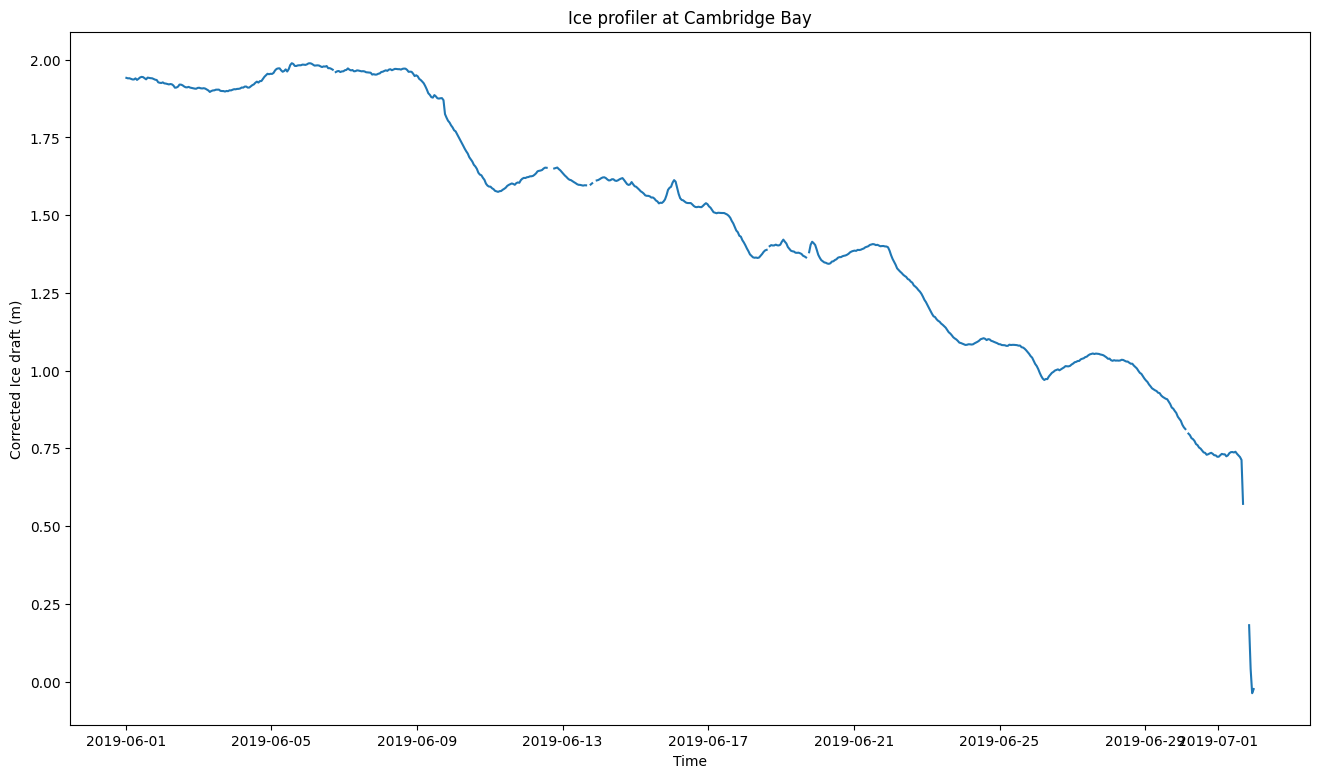

In [4]:
# Import additional library
import matplotlib.pyplot as plt

# Convert the timestamps into a datetime format
# Index the dataframe with the time-stamps
df = df.set_index(pd.to_datetime(df['sampleTimes']))

# Define the plot settings
plt.figure(figsize=[16,9])
plt.plot(df['values'])
plt.xlabel('Time')
plt.ylabel('Corrected Ice draft (m)')
plt.title('Ice profiler at Cambridge Bay')


From the above plot we can see that the ice was about 2m thick in early June, then it gradually melted to a thickness of about 75 cm on July 1st 2019. On July 2nd, the thickness dropped to zero. (Note there was a short data gap during the melting on 1-2 July 2019.) 

Here you can see a time-lapse video of what the water looked like on July 1st 2019: https://data.oceannetworks.ca/SeaTube?resourceTypeId=1000&resourceId=526&diveId=72284900&time=2019-07-01T00:00:45.000Z

<img src="/Ice Draft/Screenshot 2023-12-19 at 3.18.14 PM.png" width="100%" align="center" />

Ocean Networks Canada has a hydrophone operating at its coastal observatory installed at the seafloor. In the next exercise, we will take a look at and listen to hydrophone data from July 1st 2019.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=037a52ce-eb9d-4c29-bf1a-234277914981' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>